In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import seaborn as sns

from aiutils import load
from mcts import GameTree
from mctsutils import *

In [2]:
SMALL_SIZE = 11
MEDIUM_SIZE = 13
BIGGER_SIZE = 15

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
sandbox_colors_map = {'Copper': '#b87333', 'Curse': '#a47abb','Estate': '#9dd57d', 'Duchy': '#81a566', 'Province': '#3a923d', 'Silver': '#c0c0c0', 'Gold': '#ffd700'}
sandbox_colors = [v for v in sandbox_colors_map.values()]
colors = ['#f58025', '#000000']
pu_oj = colors[0]
blk = colors[-1]
pal = sns.color_palette('terrain_r')

In [20]:
sns.color_palette(sandbox_colors)

[(0.7215686274509804, 0.45098039215686275, 0.2),
 (0.6431372549019608, 0.47843137254901963, 0.7333333333333333),
 (0.615686274509804, 0.8352941176470589, 0.49019607843137253),
 (0.5058823529411764, 0.6470588235294118, 0.4),
 (0.22745098039215686, 0.5725490196078431, 0.23921568627450981),
 (0.7529411764705882, 0.7529411764705882, 0.7529411764705882),
 (1.0, 0.8431372549019608, 0.0)]

In [18]:
full_pal = sns.color_palette('tab20')
full_pal

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

In [34]:
full_color_map = {
    'None': full_pal[7], # light red
    'Copper': sandbox_colors_map['Copper'],
    'Estate': sandbox_colors_map['Estate'],
    'Duchy': sandbox_colors_map['Duchy'],
    'Province': sandbox_colors_map['Province'],
    'Silver': sandbox_colors_map['Silver'],
    'Gold': sandbox_colors_map['Gold'],
    'Chapel': full_pal[1],
    'Moat': full_pal[0], 
    'Village': full_pal[2], # orange
    'Militia': full_pal[6], # red
    'MoneyLender': full_pal[-2], # ocean blue
    'Smithy': full_pal[14], # grey
    'Council Room': full_pal[10], # dark brown
    'Market': full_pal[12], # pink
    'Laboratory': full_pal[11], # light brown
    'Witch': full_pal[8] # purple
}

In [4]:
project_root = '/home/justiny/Documents/Projects/PyDominion'
# project_root = '/home/justiny/Princeton/PyDominion'
model_dir = os.path.join(project_root, 'models')
fig_dir = '/home/justiny/Documents/Projects/Thesis/dominion-thesis/figures'
dpi=300

In [5]:
idx = pd.IndexSlice

## Tree Characterization ##

In [11]:
# tree_name = 'full-paper-tree-uniform'
# tree_name = 'full-paper-tree-160k-trimmed-lowc'
tree_name = 'full-paper-tree-160k-trimmed-cdecay'
# tree_name = 'full-paper-dw-tree-160k-trimmed-cdecay'

tree_path = os.path.join(model_dir, tree_name)
tree = GameTree.load(path=tree_path, train=False)

In [12]:
levels = get_level_branching_factors(tree._root)
visits = get_level_visits(tree._root)
x, y = list(zip(*levels))
vx, vy = list(zip(*visits))

In [13]:
data = pd.DataFrame({'Level': x, 'Branching Factor': y})
vy = np.array(vy)
vy[0] = sum(vy[1:5])
vdata = pd.DataFrame({'Level': vx, 'Visits': np.log2(np.array(vy))})
ldata = vdata.groupby('Level').count()
ldata.columns = ['Nodes']
ldata['Nodes'] = np.log2(ldata['Nodes'])

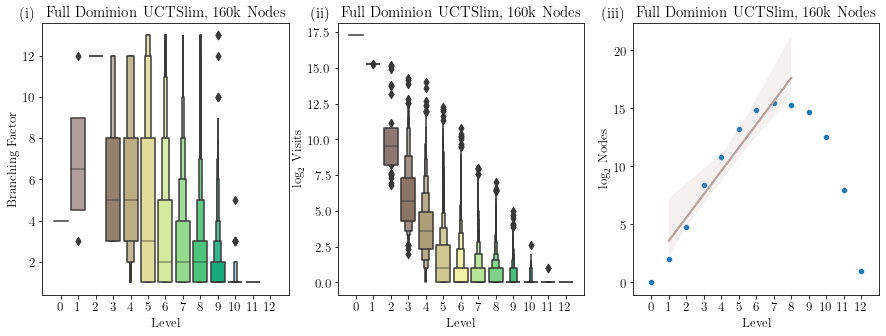

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex='all')
sns.boxenplot(x='Level', y='Branching Factor', data=data, palette='terrain_r', ax=axes[0])
axes[0].set_title('Full Dominion UCTSlim, 160k Nodes')

sns.boxenplot(x='Level', y='Visits', data=vdata, palette='terrain_r', ax=axes[1])
axes[1].set_title('Full Dominion UCTSlim, 160k Nodes')
axes[1].set_ylabel('$\log_2$ Visits')


plot_data = ldata.reset_index()
sns.scatterplot(x='Level', y='Nodes', data=plot_data, palette='terrain')
sns.regplot(x='Level', y='Nodes', data=plot_data.loc[1:8], scatter=False, ax=axes[2], color=pal[0])
axes[2].set_ylabel('$\log_2$ Nodes')
axes[2].set_title('Full Dominion UCTSlim, 160k Nodes')

axes[0].text(-0.03, 1.06, '(i)', transform=axes[0].transAxes, va='top', ha='right', fontsize=BIGGER_SIZE)
axes[1].text(-0.03, 1.06, '(ii)', transform=axes[1].transAxes, va='top', ha='right', fontsize=BIGGER_SIZE)
axes[2].text(-0.03, 1.06, '(iii)', transform=axes[2].transAxes, va='top', ha='right', fontsize=BIGGER_SIZE)

plt.show()

In [47]:
lm = LinearRegression()
x = plot_data.loc[1:8]['Level'].to_numpy().reshape(-1, 1)
y = plot_data.loc[1:8]['Nodes'].to_numpy().reshape(-1, 1)
lm.fit(x, y)
lm.coef_, lm.intercept_

(array([[1.62802522]]), array([1.46571706]))

In [15]:
fig.savefig(os.path.join(fig_dir, 'uct-slim-branching-factors.png'), dpi=dpi)
# fig.savefig(os.path.join(fig_dir, 'uct-dw-branching-factors.png'), dpi=dpi)
# fig.savefig(os.path.join(fig_dir, 'f-uct-branching-factors.png'), dpi=dpi)

In [ ]:
tree_name = 'r-r-mcts-bm-warm-start-100k-srat-sandbox-ucb1-paper'
tree_path = os.path.join(model_dir, tree_name)
tree = GameTree.load(path=tree_path, train=False)

In [ ]:
levels = get_level_branching_factors(tree._root)
visits = get_level_visits(tree._root)
x, y = list(zip(*levels))
vx, vy = list(zip(*visits))

In [ ]:
data = pd.DataFrame({'Level': x, 'Branching Factor': y})
vy = np.array(vy)
vy[0] = sum(vy[1:5])
vdata = pd.DataFrame({'Level': vx, 'Visits': np.log2(vy)})
ldata = vdata.groupby('Level').count()
ldata.columns = ['Nodes']
ldata['Nodes'] = np.log2(ldata['Nodes'])

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex='all')
sns.boxenplot(x='Level', y='Branching Factor', data=data, palette='terrain_r', ax=axes[0])
axes[0].set_title('Sandbox Dominion UCT, 100k Nodes')

sns.boxenplot(x='Level', y='Visits', data=vdata, palette='terrain_r', ax=axes[1])
axes[1].set_title('Sandbox Dominion UCT, 100k Nodes')
axes[1].set_ylabel('$\log_2$ Visits')

plot_data = ldata.reset_index()
sns.scatterplot(x='Level', y='Nodes', data=plot_data, palette='terrain')
sns.regplot(x='Level', y='Nodes', data=plot_data.loc[1:6], scatter=False, ax=axes[2], color=pal[0])
axes[2].set_ylabel('$\log_2$ Nodes')
axes[2].set_title('Sandbox Dominion UCT, 100k Nodes')

axes[0].text(-0.03, 1.06, '(i)', transform=axes[0].transAxes, va='top', ha='right', fontsize=BIGGER_SIZE)
axes[1].text(-0.03, 1.06, '(ii)', transform=axes[1].transAxes, va='top', ha='right', fontsize=BIGGER_SIZE)
axes[2].text(-0.03, 1.06, '(iii)', transform=axes[2].transAxes, va='top', ha='right', fontsize=BIGGER_SIZE)

plt.show()

In [ ]:
lm = LinearRegression()
x = plot_data.loc[1:6]['Level'].to_numpy().reshape(-1, 1)
y = plot_data.loc[1:6]['Nodes'].to_numpy().reshape(-1, 1)
lm.fit(x, y)
lm.coef_, lm.intercept_

In [ ]:
fig.savefig(os.path.join(fig_dir, 's-uct-branching-factors.png'), dpi=dpi)

## Tree Confidence Intervals ##

In [6]:
# tree_name = 'full-paper-tree-uniform'
tree_name = 'r-r-mcts-bm-hot-start-sandbox-100k-srat-uniform'
tree_path = os.path.join(model_dir, tree_name)
tree = GameTree.load(path=tree_path, train=False)

In [7]:
tree_df = tree.to_df()

In [65]:
non_curse_pal = [sandbox_colors_map['Copper'], sandbox_colors_map['Estate'], 'b', sandbox_colors_map['Silver'], sandbox_colors_map['Duchy'], sandbox_colors_map['Gold']]

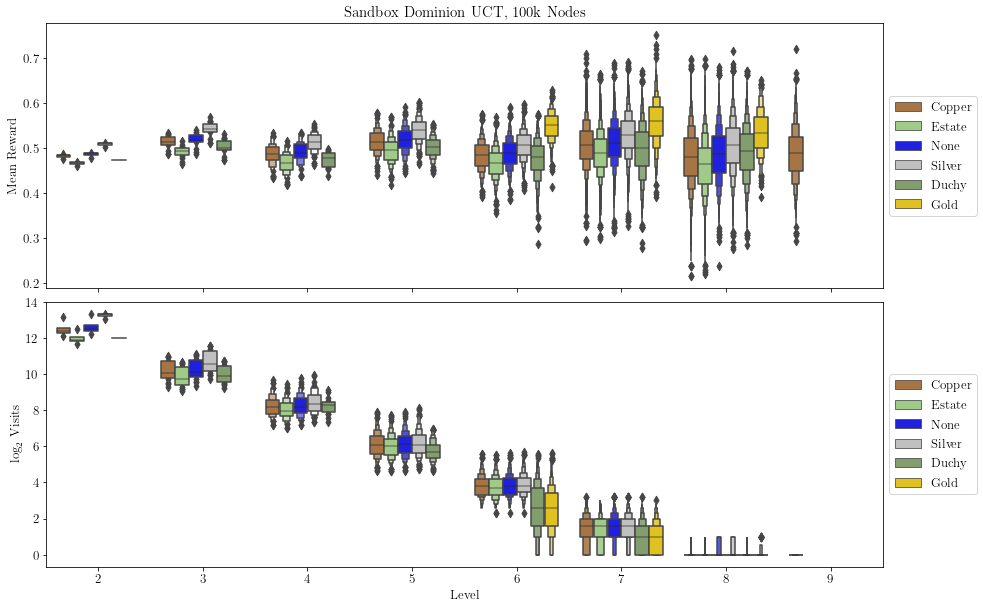

In [52]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex='all')

sns.boxenplot(x='Level', y='Mean', data=tree_df, palette=non_curse_pal, hue='Card', ax=axes[0])

plot_df = tree_df.copy()
plot_df['Visits'] = np.log2(plot_df['Visits'])
sns.boxenplot(x='Level', y='Visits', data=plot_df, palette=non_curse_pal, hue='Card', ax=axes[1])

axes[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axes[0].get_legend().remove()
axes[0].set_xlabel('')
axes[0].set_ylabel('Mean Reward')
axes[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axes[1].set_ylabel('$\log_2$ Visits')
axes[0].set_title('Sandbox Dominion UCT, 100k Nodes')
fig.subplots_adjust(wspace=0.1, hspace=0.05)
plt.show()

In [53]:
fig.savefig(os.path.join(fig_dir, 'sandbox-uct-node-rewards.png'), dpi=dpi)

In [52]:
# tree_name = 'full-paper-tree-uniform-160k'
# tree_name = 'full-paper-tree-160k-trimmed-cdecay'
tree_name = 'full-paper-dw-tree-160k-trimmed-cdecay'
tree_path = os.path.join(model_dir, tree_name)
tree = GameTree.load(path=tree_path, train=False)

In [53]:
tree_df = tree.to_df()

In [40]:
abbr = {'Copper': 'Co', 'Estate': 'Es', 'None': 'No', 'Chapel': 'Ch', 'Moat': 'Mo', 'Silver': 'Si', 'Village': 'Vi', 'Militia': 'Mi', 'MoneyLender': 'ML', 'Smithy': 'Sm', 'Duchy': 'Du', 'Council Room': 'CR', 'Laboratory': 'Lab', 'Market': 'Ma', 'Witch': 'Wi', 'Gold': 'Go', 'Province': 'Pr'}

In [54]:
cards = tree_df['Card'].unique()
pal = sns.color_palette([full_color_map[card] for card in cards])
pal

[(0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.7529411764705882, 0.7529411764705882, 0.7529411764705882),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (1.0, 0.8431372549019608, 0.0),
 (0.22745098039215686, 0.5725490196078431, 0.23921568627450981)]

<ipython-input-55-3be2cba85eef>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['Visits'] = np.log2(plot_df['Visits'])


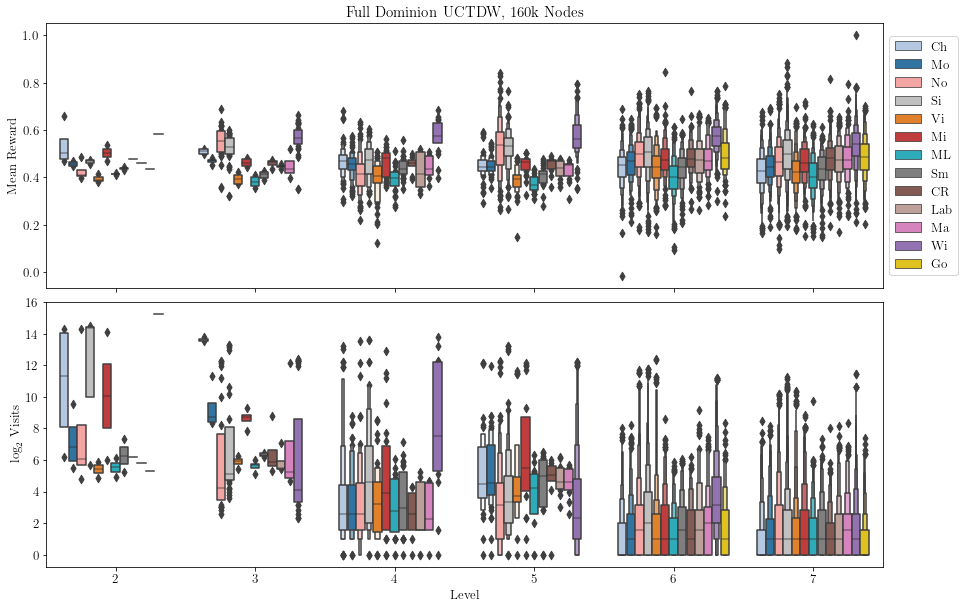

In [55]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex='all')


plot_df = tree_df[tree_df['Level'] <= 7]
sns.boxenplot(x='Level', y='Mean', data=plot_df, palette=pal, hue='Card', ax=axes[0])

plot_df = tree_df[tree_df['Level'] <= 7]
plot_df['Visits'] = np.log2(plot_df['Visits'])
sns.boxenplot(x='Level', y='Visits', data=plot_df, palette=pal, hue='Card', ax=axes[1])

axes[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
new_labels = [abbr[label.get_text()] for label in axes[0].get_legend().texts]
for t, l in zip(axes[0].get_legend().texts, new_labels): t.set_text(l)

axes[1].get_legend().remove()
axes[0].set_xlabel('')
axes[0].set_ylabel('Mean Reward')
axes[1].set_ylabel('$\log_2$ Visits')
axes[0].set_title('Full Dominion UCTDW, 160k Nodes')
fig.subplots_adjust(wspace=0.1, hspace=0.05)
plt.show()

In [56]:
# fig.savefig(os.path.join(fig_dir, 'f-uct-mean-rewards.png'), dpi=dpi)
# fig.savefig(os.path.join(fig_dir, 'uct-slim-mean-rewards.png'), dpi=dpi)
fig.savefig(os.path.join(fig_dir, 'uct-dw-mean-rewards.png'), dpi=dpi)